In [1]:
from large_gcs.graph.cost_factory import create_l2norm_edge_cost, create_l2norm_squared_edge_cost
from large_gcs.example_graphs.utils.spp_shape_gcs_utils import generate_spp_shape_gcs, load_spp_shape_gcs, SppShapeGcsGeneratorParams
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
params = SppShapeGcsGeneratorParams(should_save=True)
# params = SppShapeGcsGeneratorParams(
#     n_sets=100,
#     workspace=([-25, 25], [-25, 25]),
#     source=(0,0),
#     target=(15,15),
#     set_scale=1.2,
#     k_nearest_edges=(1,4),
#     k_nearest_pool=20,
#     random_seed=490052,
#     should_save=True,
# )
file = os.path.join(os.environ['PROJECT_ROOT'], "large_gcs", "example_graphs",
                    f"spp_{params.dim}d_v{params.n_sets}_shape_gcs.npy")
params.save_path = file

# G = generate_spp_shape_gcs(params)

# # draw convex sets and edges
# plt.figure(figsize=(20,20))
# G.plot_sets()
# G.plot_edges()
# G.plot_set_labels()
# plt.grid()
# plt.xlim(params.workspace[0]* 1.2)
# plt.ylim(params.workspace[1]* 1.2)
# plt.show()

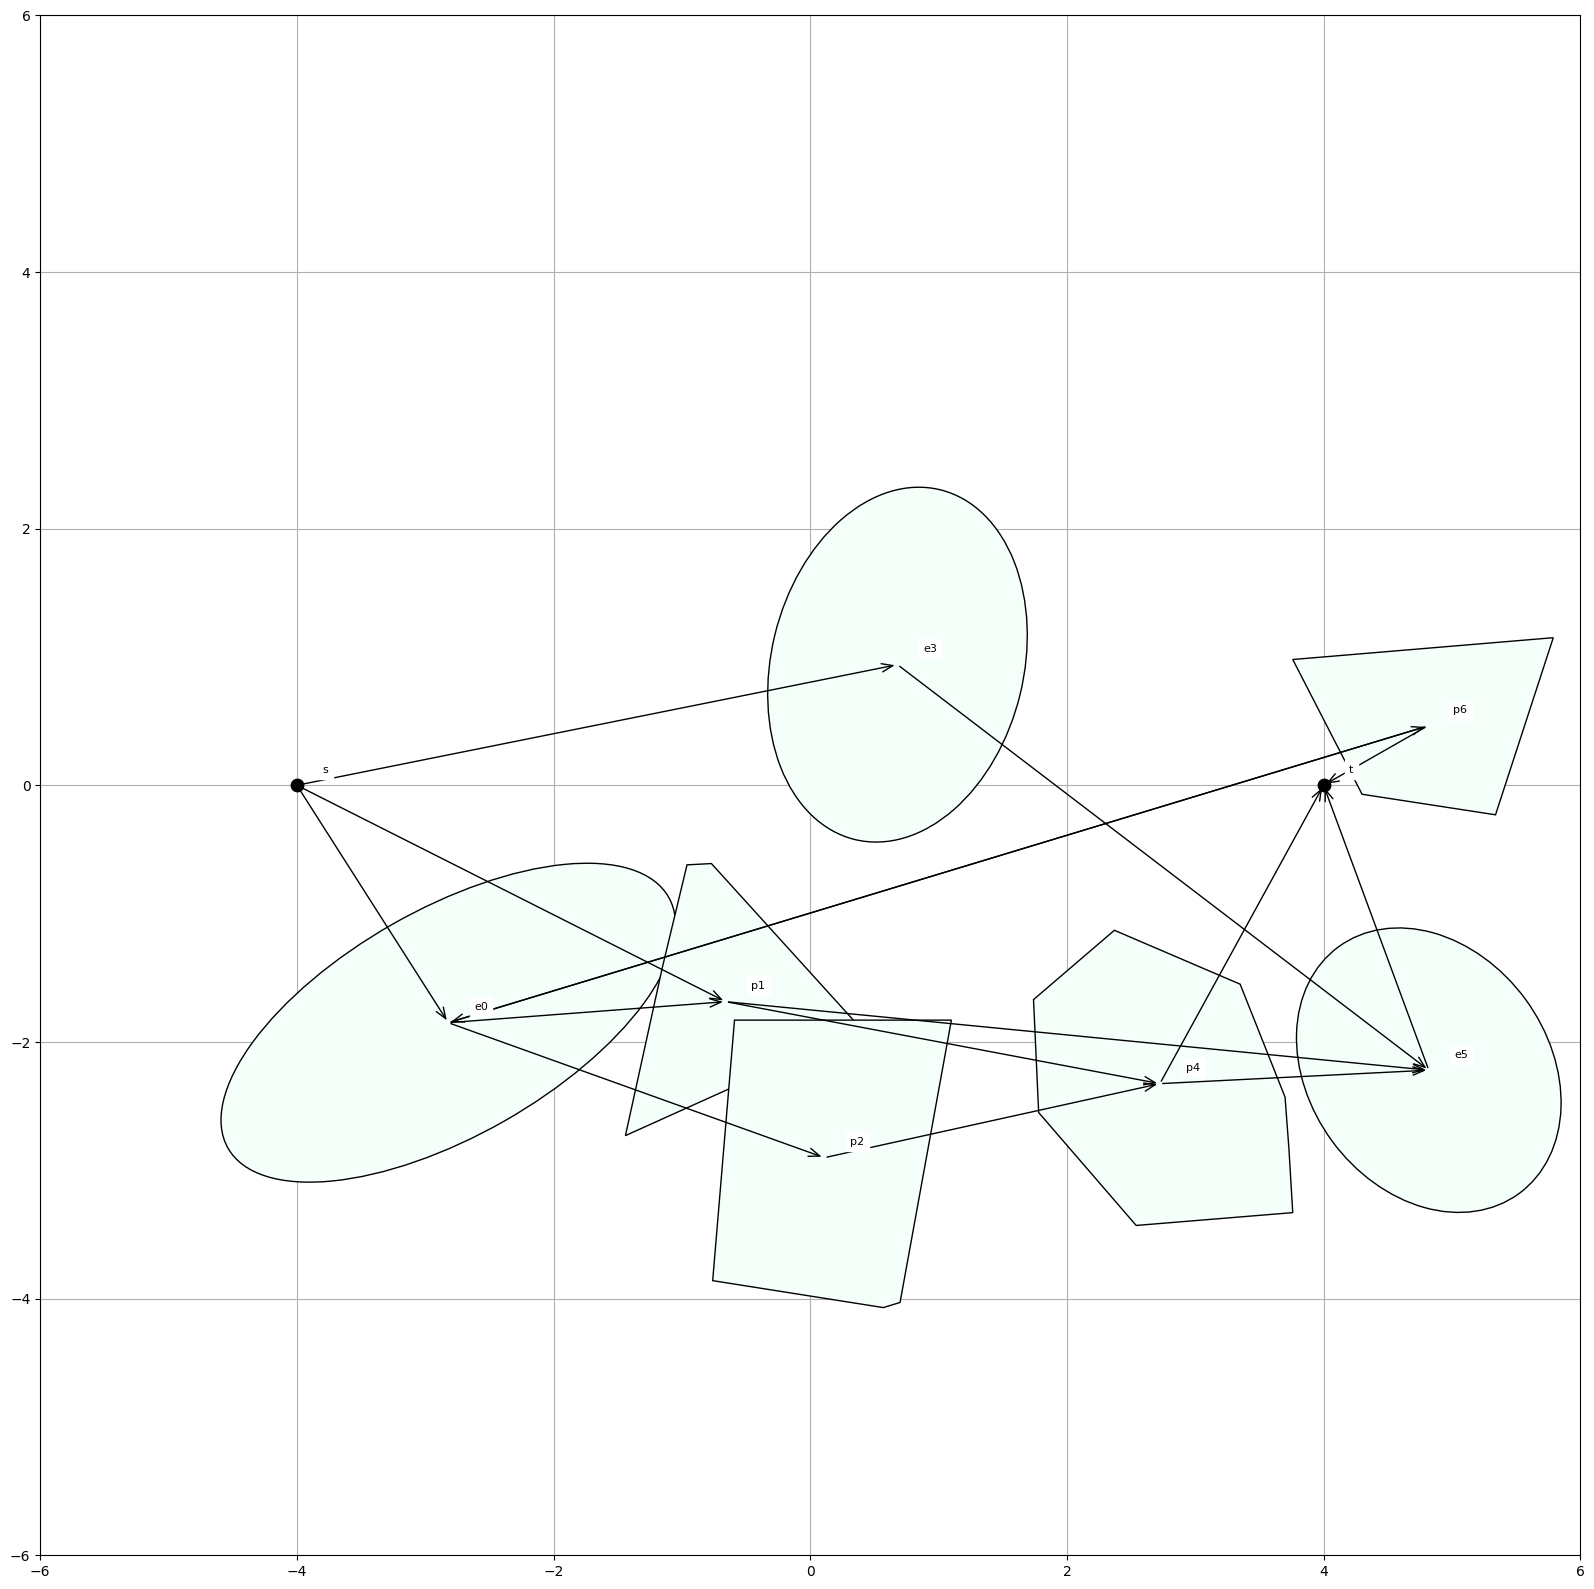

In [3]:
G = load_spp_shape_gcs(file, create_l2norm_edge_cost)
sol = G.solve_shortest_path()

# draw convex sets and edges
plt.figure(figsize=(20,20))
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
# G.plot_path(sol.path)
plt.grid()
plt.xlim(np.array(params.workspace[0])* 1.2)
plt.ylim(np.array(params.workspace[1])* 1.2)

plt.show()

In [4]:
sol

ShortestPathSolution(cost=8.453243165380153, time=0.008831977844238281, path=[('s', array([-3.99999999,  0.        ]))], flows=[1.1591347514719104e-07, 2.4871520106734876e-06, 1.6215060428089378e-07, 0.9999997019412467, 8.132875418962979e-09, 8.102705737436114e-08, 8.109833394125581e-08, 9.767696440225228e-09, 2.190881097700721e-08, 0.0, 0.9999998421436758, 4.0061258063873166e-08, 0.0, 1.1591347514719104e-07, 2.765276668776664e-06, 0.9999972229969482, 9.767696440225228e-09], result=<pydrake.solvers.MathematicalProgramResult object at 0x17ff0bfb0>)

In [5]:
print(G.vertex_names)

['s', 't', 'e0', 'e3', 'e5', 'p1', 'p2', 'p4', 'p6']


In [7]:
for key, flow in zip(G.edge_keys, sol.flows):
    if flow > 0.99:
        print(key, flow)

('p1', 'p4') 0.9999997019412467
('e5', 't') 0.9999998421436758
('s', 'e3') 0.9999972229969482


In [6]:
for key, flow in zip(G.edge_keys, sol.flows):
    print(key, flow)

('e0', 'p6') 1.1591347514719104e-07
('e0', 'p1') 2.4871520106734876e-06
('e0', 'p2') 1.6215060428089378e-07
('p1', 'p4') 0.9999997019412467
('p1', 'e5') 8.132875418962979e-09
('p2', 'p4') 8.102705737436114e-08
('e3', 'e5') 8.109833394125581e-08
('p4', 'e5') 9.767696440225228e-09
('p4', 'p4') 2.190881097700721e-08
('p4', 't') 0.0
('e5', 't') 0.9999998421436758
('p6', 'e0') 4.0061258063873166e-08
('p6', 't') 0.0
('s', 'e0') 1.1591347514719104e-07
('s', 'p1') 2.765276668776664e-06
('s', 'e3') 0.9999972229969482
